# Brief introduction to Scikit-Learn

In [0]:
# get the data
import numpy as np
import pandas as pd
heart_disease = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [0]:
# Create features matrix
features_data = heart_disease.drop('target',axis=1)

#Create label
label_data = heart_disease['target']

In [0]:
# Chose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
# Classifie
clf = RandomForestClassifier()
# Keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [0]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_data, label_data,test_size=0.2)

In [0]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# kame a prediction
y_label = clf.predict(np.array([0,2,3,4]))
# Erro: the array hasnt the shape of the training model

ValueError: ignored

In [0]:
y_preds = clf.predict(x_test)
y_preds

In [0]:
# Evaluate the model
clf.score(x_train,y_train)

In [0]:
clf.score(x_test,y_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

In [0]:
print(confusion_matrix(y_test,y_preds))

In [0]:
print(accuracy_score(y_test,y_preds))

In [0]:
# Model improvemnt
# Try differerent amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
  print(f"Trying model with {i} estimators...")
  clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
  print(f"Model accuray on test set: {clf.score(x_test,y_test) * 100:.2f}%")
  print()

In [0]:
# save a model and load it
import pickle
pickle.dump(clf,open("random_forst_model_1.pkl","wb"))

In [0]:
loaded_model = pickle.load(open("random_forst_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)

# Gettin our data ready to be used with machine learning


We have to do, basic, three things:
* Split the data into features and label
* Filling or disregarding missing values (the model can't learn nothing about empty values)
* Converting non-numerical values to numerical values

In [0]:
# get the data
import numpy as np
import pandas as pd
heart_disease = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [0]:
x_features = heart_disease.drop('target',axis=1)
x_features.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1


In [0]:
y_label = heart_disease['target']
y_label.head(1)

0    1
Name: target, dtype: int64

In [0]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x_features,y_label,test_size=0.2)

In [0]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

# Make sure it's all numerical

In [0]:
car_sales = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv')
car_sales.head(1)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323


In [0]:
len(car_sales)

1000

In [0]:
x_features = car_sales.drop('Price',axis=1)
y_label = car_sales['Price']

x_train, x_test, y_train, y_test = train_test_split(x_features,y_label,test_size=0.2)

In [0]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

ValueError: ignored

In [0]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x = transformer.fit_transform(x_features)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [0]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [0]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [0]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [0]:
# refit the model 
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y_label,test_size=0.2)
clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
clf.score(x_test,y_test)

0.3235867221569877

# What if there wre missing  values?
* Fill them with some value
* Remove the sample with missing data altogether

In [0]:
car_sales_missing = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv')
car_sales_missing.head(1)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0


In [0]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [0]:
x_features = car_sales_missing.drop('Price',axis=1)
y_label = car_sales_missing['Price']

In [0]:
categorical_features = ['Make','Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x = transformer.fit_transform(x_features)
transformed_x

ValueError: ignored

Option 1 : fill missing data

In [0]:
car_sales_missing['Make'].fillna('missing',inplace=True)
car_sales_missing['Colour'].fillna('missing',inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)
car_sales_missing['Doors'].fillna(4,inplace=True)

In [0]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [0]:
# Remove priceless data
car_sales_missing.dropna(inplace=True)

In [0]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [0]:
# Setting the new values
x_features = car_sales_missing.drop('Price',axis=1)
y_label = car_sales_missing['Price']

In [0]:
# Converting data to numerical
categorical_features = ['Make','Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x = transformer.fit_transform(x_features)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

Option 2: Fill missing values with scikit learn

In [0]:
car_sales_missing = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv')
car_sales_missing.head(1)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0


In [0]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [0]:
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

* Always split(train/test) the data before any manipulation/transform

In [0]:
x_features = car_sales_missing.drop('Price',axis=1)
y_label = car_sales_missing['Price']
from sklearn.model_selection import  train_test_split
# Split data into sets
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x_features,y_label,test_size=0.2)
x_train.head()

,Make,Colour,Odometer (KM),Doors
986,Honda,White,71934.0,4.0
297,Toyota,Red,162665.0,4.0
566,Honda,White,42844.0,4.0
282,Honda,White,195829.0,4.0
109,Honda,Blue,219217.0,4.0


In [0]:
# Fill Defines
# Fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
categorical_imputer = SimpleImputer(strategy='constant', fill_value ='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Column define
categorical_feature = ['Make', 'Colour']
door_feature = ['Doors']
num_feature = ['Odometer (KM)']

# Create an imputer
imputer = ColumnTransformer([
                             ('categorical_imputer',categorical_imputer,categorical_feature),
                             ('door_imputer',door_imputer,door_feature),
                             ('num_imputer',num_imputer,num_feature)
                             ])

In [0]:
# Transform
filled_x_train = imputer.fit_transform(x_train)
filled_x_test = imputer.fit_transform(x_test)
filled_x_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [0]:
car_sale_filled_train = pd.DataFrame(filled_x_train,columns=['Make','Color','Doors','Odometer (KM)'])
car_sale_filled_train.head()

,Make,Color,Doors,Odometer (KM)
0,Honda,White,4,71934
1,Toyota,Red,4,162665
2,Honda,White,4,42844
3,Honda,White,4,195829
4,Honda,Blue,4,219217


In [0]:
car_sale_filled_test = pd.DataFrame(filled_x_test,columns=['Make','Color','Doors','Odometer (KM)'])
car_sale_filled_test.head()

,Make,Color,Doors,Odometer (KM)
0,Toyota,Blue,4,99761
1,Toyota,Black,4,17975
2,Honda,Blue,4,197664
3,Nissan,Green,4,235589
4,Honda,Black,4,231659


In [0]:
# Transform non-numerical to numerical value
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
nonNumerical_features = ['Make','Color','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,nonNumerical_features)],remainder='passthrough')
transformed_train = transformer.fit_transform(car_sale_filled_train)
transformed_test = transformer.fit_transform(car_sale_filled_test)

In [0]:
transformed_train

<760x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3040 stored elements in Compressed Sparse Row format>

In [0]:
transformed_test

<190x15 sparse matrix of type '<class 'numpy.float64'>'
	with 760 stored elements in Compressed Sparse Row format>

In [0]:
# Fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(transformed_train,y_train)
model.score(transformed_test, y_test)

0.25366332156443805

# Choosing the right estimator/algorithm for our problem

scikit-learn uses estimator as another term for machine learning model or algorithm.

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

In [0]:
# import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [0]:
# Turn in a data frame
boston_df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
len(boston_df)

506

In [0]:
# Use scikit-learn map to find an algorithm to use
# https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_features = boston_df.drop('target',axis=1)
y_label = boston_df['target']

x_train,x_test,y_train,y_test = train_test_split(x_features,y_label,test_size=0.2)

model = Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6662221670168522

In [0]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x_features = boston_df.drop('target',axis=1)
y_label = boston_df['target']

x_train,x_test,y_train,y_test = train_test_split(x_features,y_label,test_size=0.2)

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.873969014117403

In [0]:
model.score(x_test,y_test)

0.6662221670168522

# Choosing an estimator for a classification problem

based on https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [0]:
heart_disease = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
len(heart_disease)

303

In [0]:
#LinearSVC estimator
from sklearn.svm import LinearSVC
#setup random seed
np.random.seed(42)
x_features = heart_disease.drop('target',axis=1)
y_label = heart_disease['target']

#split the data
x_train, x_test, y_train, y_test = train_test_split(x_features,y_label,test_size=0.2)
clf = LinearSVC()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8688524590163934

In [0]:
#RandomForestClassifier estimator
from sklearn.ensemble import RandomForestClassifier
#setup random seed
np.random.seed(42)
x_features = heart_disease.drop('target',axis=1)
y_label = heart_disease['target']

#split the data
x_train, x_test, y_train, y_test = train_test_split(x_features,y_label,test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8524590163934426

#Fit the model on our data and use it to make predictions

## Fitting the model to the data

In [0]:
#RandomForestClassifier estimator
from sklearn.ensemble import RandomForestClassifier
#setup random seed
np.random.seed(42)
x_features = heart_disease.drop('target',axis=1)
y_label = heart_disease['target']

#split the data
x_train, x_test, y_train, y_test = train_test_split(x_features,y_label,test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)

#fit the model to the data
clf.fit(x_train,y_train)

clf.score(x_test,y_test)

## Make predictions using machine learning model
1. `predict()`
2. `predict_proba()`

In [0]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [0]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)


In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [0]:
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

`predict()` can also be used fro regression models.

In [0]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

#create the data
features_data = boston_df.drop('target',axis=1)
labels = boston_df['target']

x_train,x_test,y_train,y_test = train_test_split(features_data,labels,test_size=0.2)

model = RandomForestRegressor().fit(x_train,y_train)

preds_result = model.predict(x_test)

In [0]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,preds_result)

2.1226372549019623

# Evaluating a machine learning model

In [0]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

features = heart_disease.drop('target',axis=1)
labels = heart_disease['target']

x_train,x_test, y_train, y_test  = train_test_split(features,labels,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
clf.score(x_train,y_train)

1.0

In [0]:
clf.score(x_test,y_test)

0.8524590163934426

In [0]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

#create the data
features_data = boston_df.drop('target',axis=1)
labels = boston_df['target']

x_train,x_test,y_train,y_test = train_test_split(features_data,labels,test_size=0.2)

model = RandomForestRegressor().fit(x_train,y_train)


In [0]:
model.score(x_test,y_test)

0.873969014117403

# Evaluating a model using the `scoring` parameter

In [0]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

features = heart_disease.drop('target',axis=1)
labels = heart_disease['target']

x_train,x_test, y_train, y_test  = train_test_split(features,labels,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train);

In [0]:
clf.score(x_test,y_test)

0.8524590163934426

In [0]:
cross_val_score(clf,features,labels)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

# Classification model evaluation metrics
1. Accuracy
2. Area Under ROC curve
3. Confusion Matrix
4. Classification report

In [0]:
#ACCURACY
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

features = heart_disease.drop('target',axis=1)
labels = heart_disease['target']

clf = RandomForestClassifier()
cross_accuracy = np.mean(cross_val_score(clf,features,labels,cv=5))


In [0]:
print(f'The accuracy is:{(cross_accuracy)*100:.2f}')

The accuracy is:82.48


Area under the receiver operating characteristic curve (AUC/ROC)

ROC curves are a compararison of a model's true positive rate(tpr) versus a models false positive rate (fpr).

In [0]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.2)

In [0]:
from sklearn.metrics import roc_curve
clf.fit(x_train,y_train)

probs_result = clf.predict_proba(x_test)
probs_result[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [0]:
probs_positive = probs_result[:,1]
probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [0]:
# calculate fpr, tpr and thresholds
fpr,tpr,thresholds = roc_curve(y_test,probs_positive)

fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

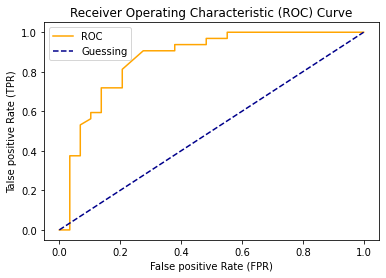

In [0]:
# Create a function for plottin ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')
  plt.xlabel('False positive Rate (FPR)')
  plt.ylabel('Talse positive Rate (TPR)')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()
plot_roc_curve(fpr,tpr)

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,probs_positive)

0.8669181034482759

Confusion Matrix

A confusiom matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an ideia of where the model is getting confunsed.

In [0]:
from sklearn.metrics import confusion_matrix

pred_result = clf.predict(x_test)

confusion_matrix(y_test,pred_result)

array([[23,  6],
       [ 6, 26]])

In [0]:
pd.crosstab(y_test,pred_result,rownames=['Actual Labels'],colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


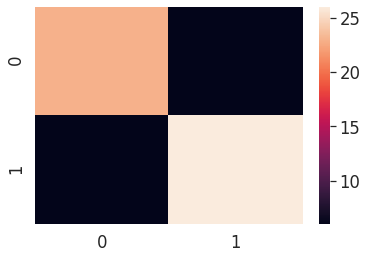

In [0]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test,pred_result)
sns.heatmap(conf_mat)

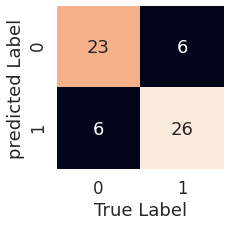

In [0]:
def plot_conf_mat(conf_mat):
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(conf_mat, annot=True, cbar=False)
  plt.xlabel('True Label')
  plt.ylabel('predicted Label');

plot_conf_mat(conf_mat)